# TRAIN ALL FILLS, VALIDATION ALL FILLS, ALL DETECTORS

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import matplotlib.pyplot as pl
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [2]:
# Data loading and pre-processing:
data_dir = '/afs/cern.ch/user/m/mrapelli/private/filldata/'
#merged_data = pd.DataFrame()

for filename in sorted(os.listdir(data_dir), reverse=True):
    if not filename.startswith("lumiData"): continue
    print(filename)
    dataset = pd.read_csv(os.path.join(data_dir, filename), sep=',')
    dataset = dataset.drop(columns=['E(GeV)'])
    print (dataset.shape)
    dataset.columns = ['Timestamp','fill', 'pltzero', 'bcm1f', 'hfoc']
    dataset = dataset.set_index('Timestamp')
    #dataset.index = pd.DatetimeIndex(dataset.index).round(freq='1s')
    #dataset.index = pd.to_datetime(dataset.index)
    #dataset.columns[1] = pd.datetime.strptime(dataset.columns[1], "%X")
    print(dataset.head())    
    #print(dataset.index)
    print(dataset.index.shape)
    #print(type(dataset)) 

lumiData_fillRange.csv
(40758, 5)
            fill   pltzero     bcm1f      hfoc
Timestamp                                     
1656979796  7916  0.007553  0.007406  0.006119
1656979815  7916  0.007098  0.006290  0.005698
1656979838  7916  0.006711  0.006589  0.005369
1656979862  7916  0.007862  0.008623  0.006937
1656979885  7916  0.008179  0.008251  0.006847
(40758,)


In [3]:
display(dataset)

,fill,pltzero,bcm1f,hfoc
Timestamp,,,,
1656979796,7916,0.007553,0.007406,0.006119
1656979815,7916,0.007098,0.006290,0.005698
1656979838,7916,0.006711,0.006589,0.005369
1656979862,7916,0.007862,0.008623,0.006937
1656979885,7916,0.008179,0.008251,0.006847
...,...,...,...,...
1660006952,8111,0.000009,0.000000,0.000000
1660006976,8111,0.000009,0.000000,0.000000
1660006999,8111,0.000019,0.000000,0.000000


In [4]:
fills = dataset['fill'].unique()
print(np.shape(fills))
fills

(50,)


array([7916, 7920, 7921, 7923, 7960, 7963, 7965, 7966, 7967, 7969, 7978,
       8007, 8016, 8017, 8018, 8019, 8020, 8022, 8023, 8027, 8030, 8033,
       8043, 8046, 8057, 8058, 8059, 8062, 8063, 8067, 8068, 8072, 8073,
       8076, 8078, 8079, 8081, 8083, 8087, 8088, 8091, 8094, 8098, 8099,
       8100, 8102, 8103, 8106, 8108, 8111])

In [5]:
#bad_fills = [7920, 7921, 7963, 7966, 7969, 8016, 8018, 8019, 8020, 8027, 8030, 8046, 8057, 8059, 8062, 8067, 8072, 8073, 8081, 8083, 8094, 8098, 8099, 8100, 8102, 8103, 8106]
bad_fills = [7920, 7921, 7963, 7966, 7969, 8016, 8018, 8019, 8020, 8027, 8030, 8046, 8057, 8059, 8062, 8067, 8072, 8073, 8081, 8083, 8094, 8098, 8099, 8102]

good_fills = [f for f in fills if f not in bad_fills]

In [6]:
dataset_train = dataset[dataset.fill.apply(lambda x : x in good_fills)]
dataset_test = dataset[dataset.fill.apply(lambda x : x in bad_fills)]

#dataset_train = dataset[dataset.fill.apply(lambda x : x ==7921)]
#dataset_test = dataset[dataset.fill.apply(lambda x : x ==7916)]

<AxesSubplot:xlabel='Timestamp'>

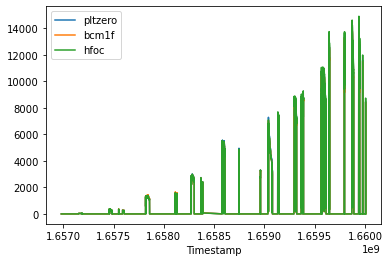

In [7]:
dataset_train.drop(columns=['fill']).plot()

<AxesSubplot:xlabel='Timestamp'>

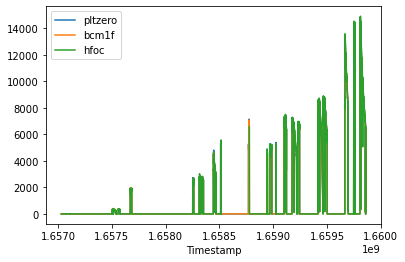

In [8]:
dataset_test.drop(columns=['fill']).plot()

In [9]:
# Data loading and pre-processing:
dataset_test = dataset_test.dropna()
dataset_train = dataset_train.dropna()
dataset_train[dataset_train.isna().any(axis=1)] 
dataset_test[dataset_test.isna().any(axis=1)] 
#dataset_train = dataset_train.drop(dataset_train.columns[0], axis=1)
#dataset_test = dataset_test.drop(dataset_test.columns[0], axis=1)
display(dataset_train)
display(dataset_test)

,fill,pltzero,bcm1f,hfoc
Timestamp,,,,
1656979796,7916,0.007553,0.007406,0.006119
1656979815,7916,0.007098,0.006290,0.005698
1656979838,7916,0.006711,0.006589,0.005369
1656979862,7916,0.007862,0.008623,0.006937
1656979885,7916,0.008179,0.008251,0.006847
...,...,...,...,...
1660006952,8111,0.000009,0.000000,0.000000
1660006976,8111,0.000009,0.000000,0.000000
1660006999,8111,0.000019,0.000000,0.000000


,fill,pltzero,bcm1f,hfoc
Timestamp,,,,
1657031099,7920,0.000301,0.000309,0.000000
1657031102,7920,0.000292,0.000245,0.000000
1657031125,7920,0.000411,0.000336,0.000000
1657031148,7920,0.000565,0.000345,0.000000
1657031172,7920,0.000540,0.000508,0.000000
...,...,...,...,...
1659859502,8102,6330.852693,6325.928212,6483.756241
1659859525,8102,6334.536898,6330.130013,6488.344285
1659859548,8102,2909.360416,2956.071694,2826.560285


In [10]:
from sklearn import preprocessing

# Normalize data
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(dataset_train), 
                              columns=dataset_train.columns, 
                              index=dataset_train.index)
# Random shuffle training data
#X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(dataset_test), 
                             columns=dataset_test.columns, 
                             index=dataset_test.index)

In [11]:
X_train

,fill,pltzero,bcm1f,hfoc
Timestamp,,,,
1656979796,0.0,5.238167e-07,5.146756e-07,4.102044e-07
1656979815,0.0,4.922206e-07,4.370904e-07,3.819739e-07
1656979838,0.0,4.654015e-07,4.579056e-07,3.599269e-07
1656979862,0.0,5.452263e-07,5.991969e-07,4.650461e-07
1656979885,0.0,5.671984e-07,5.733339e-07,4.589931e-07
...,...,...,...,...
1660006952,1.0,6.524951e-10,0.000000e+00,0.000000e+00
1660006976,1.0,6.524951e-10,0.000000e+00,0.000000e+00
1660006999,1.0,1.304921e-09,0.000000e+00,0.000000e+00


<AxesSubplot:xlabel='Timestamp'>

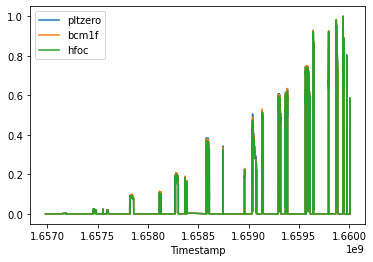

In [12]:
X_train.drop(columns=['fill']).plot()

In [13]:
#Prepocessing, drop channel column
trainX=X_train.drop(columns = ["fill"]) 
#trainX=trainX.drop(trainX.columns[[0]], axis=1)
display(trainX)
testX = X_test.drop(columns = ["fill"]) 
#testX=testX.drop(testX.columns[[0]], axis=1)
display(testX)

,pltzero,bcm1f,hfoc
Timestamp,,,
1656979796,5.238167e-07,5.146756e-07,4.102044e-07
1656979815,4.922206e-07,4.370904e-07,3.819739e-07
1656979838,4.654015e-07,4.579056e-07,3.599269e-07
1656979862,5.452263e-07,5.991969e-07,4.650461e-07
1656979885,5.671984e-07,5.733339e-07,4.589931e-07
...,...,...,...
1660006952,6.524951e-10,0.000000e+00,0.000000e+00
1660006976,6.524951e-10,0.000000e+00,0.000000e+00
1660006999,1.304921e-09,0.000000e+00,0.000000e+00


,pltzero,bcm1f,hfoc
Timestamp,,,
1657031099,2.087873e-08,2.144230e-08,0.000000
1657031102,2.022631e-08,1.702806e-08,0.000000
1657031125,2.849072e-08,2.333515e-08,0.000000
1657031148,3.914749e-08,2.396557e-08,0.000000
1657031172,3.743487e-08,3.531856e-08,0.000000
...,...,...,...
1659859502,4.390318e-01,4.395912e-01,0.434640
1659859525,4.392873e-01,4.398832e-01,0.434948
1659859548,2.017583e-01,2.054186e-01,0.189479


In [14]:
# Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver= 'full')
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = X_train.index

X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = X_test.index

In [15]:
def cov_matrix2(data):
    #calcualte covariance amongst scaled values
    for col in data.columns:
        data[col] = data[col]-data[col].mean()
        
    cov_matrix = np.dot(data.T,data)/(len(data) - 1)
    if is_pos_def(cov_matrix):
        inv_covariance_matrix = np.linalg.inv(cov_matrix)
        if is_pos_def(inv_covariance_matrix):
                return cov_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")

def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return md

def EuclideanDist(data, mean_distr):
    dist = []
    for i in range(len(data)):
        dist.append(np.linalg.norm(data[i]-mean_distr))
    return dist

def CosineDist(data, mean_distr):
    dist = []
    mean = [mean_distr] * np.shape(data)[0]
    dist = data*mean/(np.linalg.norm(data)*np.linalg.norm(mean))
    #for i in range(len(data)):
        #dist.append(np.dot(data[i],mean[i]))
    #dist = dist /(np.linalg.norm(data)*np.linalg.norm(mean))
    return dist 

def ManhattanDist(data, mean_distr):
    dist = []
    for i in range(len(data)):
        dist.append(sum(abs(data[i]-mean_distr)))
    return dist

def MD_detectOutliers(dist, extreme=False, verbose=False, euclidean=False, cosine=False, manhattan=False):
    if extreme:
        k=3
    elif euclidean or cosine or manhattan:
        k=2
    else:
        k=2
    threshold = np.mean(dist) * k
    outliers = []
    for i in range(len(dist)):
        if dist[i] >= threshold:
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

def MD_threshold(dist, extreme=False, euclidean=False, cosine=False, verbose=False, manhattan=False):
    if extreme:
        k=3
    elif euclidean or cosine or manhattan:
        k=2
    else:
        k=2
    threshold = np.mean(dist) * k
    return threshold

def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

In [16]:
data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)

cov_matrix, inv_cov_matrix  = cov_matrix2(X_train_PCA)
#cov_matrix, inv_cov_matrix  = cov_matrix(data_train)
mean_distr = data_train.mean(axis=0)

dist_test = MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)
threshold = MD_threshold(dist_train, extreme = True)
#cov_calc = cov_matrix2(X_train_PCA) #calling the above function
display(cov_matrix)
display(inv_cov_matrix)

array([[3.00727258e-01, 9.14610668e-19],
       [9.14610668e-19, 2.56114878e-02]])

array([[ 3.32527223e+00, -1.18748644e-16],
       [-1.18748644e-16,  3.90449788e+01]])

In [17]:
threshold

3.6977151525824388

<Figure size 432x288 with 0 Axes>

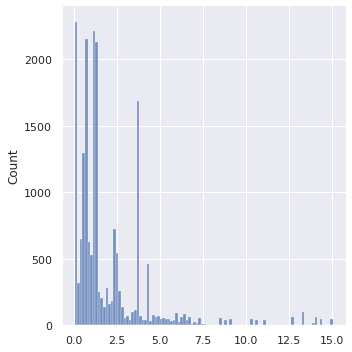

In [18]:
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
sns.displot(np.square(dist_train),
             bins = 100, 
             kde= False);
#plt.axvline(x=threshold, color = 'red')
#plt.xlim([0.0,150])

Text(0.5, 6.799999999999979, 'Mahalanobis dist')

<Figure size 432x288 with 0 Axes>

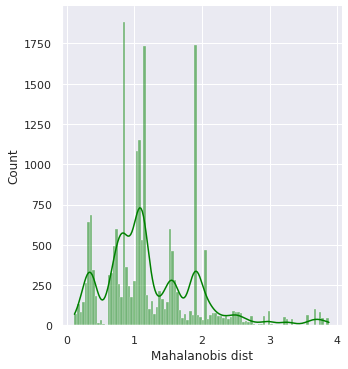

In [19]:
plt.figure()
sns.displot(dist_train,
             bins = 100, 
             kde= True, 
            color = 'green');
#plt.xlim([0.0,15])
#plt.yscale('log')
plt.xlabel('Mahalanobis dist')
#plt.axvline(x=threshold, color = 'red')

Text(0.5, 6.799999999999979, 'Mahalanobis dist')

<Figure size 432x288 with 0 Axes>

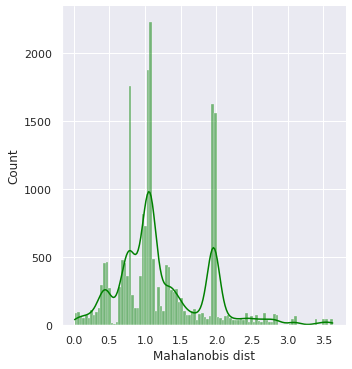

In [20]:
plt.figure()
sns.displot(dist_test,
             bins = 100, 
             kde= True, 
            color = 'green');
#plt.axvline(x=threshold, color = 'red')
#plt.xlim([0.0,15])
#plt.yscale('log')
plt.xlabel('Mahalanobis dist')

In [21]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
anomaly.head()

,Mob dist,Thresh,Anomaly
Timestamp,,,
1657031099,1.970662,3.697715,False
1657031102,1.970662,3.697715,False
1657031125,1.970662,3.697715,False
1657031148,1.970662,3.697715,False
1657031172,1.970662,3.697715,False


In [22]:
anomaly_alldata = pd.concat([anomaly_train, anomaly])
anomaly_alldata.to_csv('Anomaly_distance_Mahalanobis.csv')
#anomaly_alldata.plot(logy=True, figsize = (10,6), ylim = [1e-1,1e3], color = ['green','red'])

<AxesSubplot:xlabel='Timestamp'>

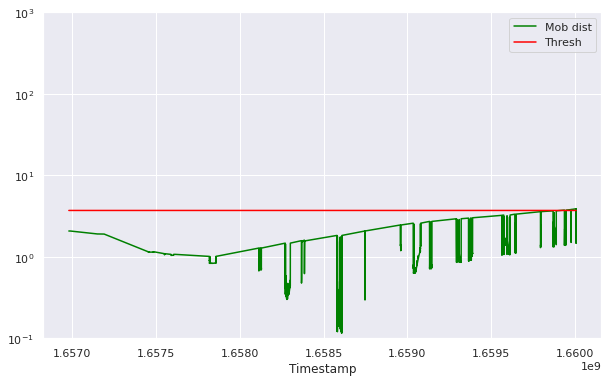

In [23]:
anomaly_train.plot(logy=True, figsize = (10,6), ylim = [1e-1,1e3], color = ['green','red'])

<AxesSubplot:xlabel='Timestamp'>

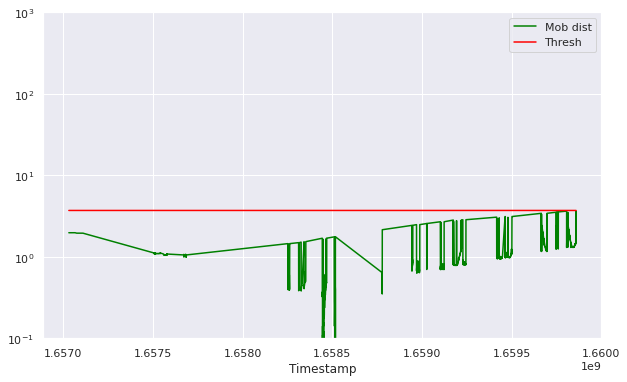

In [24]:
anomaly.plot(logy=True, figsize = (10,6), ylim = [1e-1,1e3], color = ['green','red'])